Here is the description of all the variables / features available in the dataset which will help you to perform EDA:

* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
* trip_duration - (target) duration of the trip in seconds

# Setup

In [ ]:
! pip install geopy

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## Loading Data
Loading the csv as a dataframe and checking structure of the dataset

In [ ]:
path = input("Enter the path:") 
os.chdir(path)

In [ ]:
df = pd.read_csv("nyc_taxi_trip_duration.csv")

# Peeking at the data

In [ ]:
df.shape

(729322, 11)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [ ]:
# checking data-types of variables to identify the numerical and categorical variables
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Let us see the number of vendors in the dataset.

In [ ]:
df['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

There are 2 vendors: thus, we can consider vendor_id as categorical variable even though it is of integer type.

# Categorizing the features :


Let's divide features into categories:

Geographical: pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude   

Time related: pickup_datetime, dropoff_datetime

Identifier: id(not useful for analysis)

Others: vendor_id, passenger_count, store_and_fwd_flag

Target: trip_duration

# Peeking into  numerical features

Let us check the distribution of the non -target numerical variables

In [ ]:
numerical_cols = ['passenger_count','pickup_longitude' , 'pickup_latitude' , 'dropoff_longitude' , 'dropoff_latitude']
df[numerical_cols].describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000
mean,1.662055,-73.973513,40.750919,-73.973422,40.751775
std,1.312446,0.069754,0.033594,0.069588,0.036037
min,0.000000,-121.933342,34.712234,-121.933304,32.181141
25%,1.000000,-73.991859,40.737335,-73.991318,40.735931
50%,1.000000,-73.981758,40.754070,-73.979759,40.754509
75%,2.000000,-73.967361,40.768314,-73.963036,40.769741
max,9.000000,-65.897385,51.881084,-65.897385,43.921028


From the above table we do not see many outliers, with the exception of higher values of pickup and dropoff longitudes.


# Target variable exploration

In [ ]:
# Checking minimum trip time
df['trip_duration'].min()

1

In [ ]:
# Checking maximum trip time
df['trip_duration'].max()

1939736

In [ ]:
# Checking distribution for trip time
df['trip_duration'].describe().apply(lambda x: format(x, 'f')) #ensuring we get values in float and not in scientific notation 

count     729322.000000
mean         952.229133
std         3864.626197
min            1.000000
25%          397.000000
50%          663.000000
75%         1075.000000
max      1939736.000000
Name: trip_duration, dtype: object

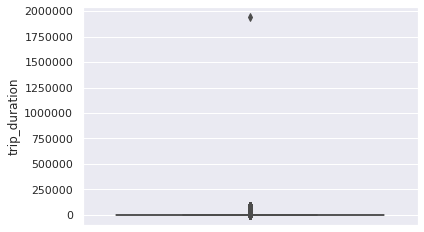

In [ ]:
sns.boxplot(df['trip_duration'], orient='vertical')

Let us set a limit to y axis, so that we can visualize the distribution better, we'll miss out on a few outliers in this case 

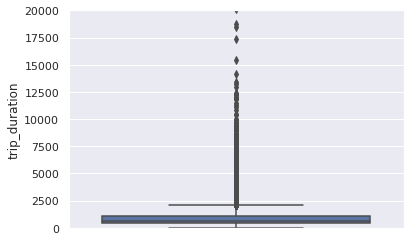

In [ ]:
plt.ylim(0, 20000)
sns.boxplot(df['trip_duration'], orient='vertical')

From the above boxplots, we can infer that most trips complete within 2500 seconds, but few last longer, as long as 2000000 seconds. Below is the histogram after applying log transform on trip_duration variable, which helps us visualize the distribution in a clear manner

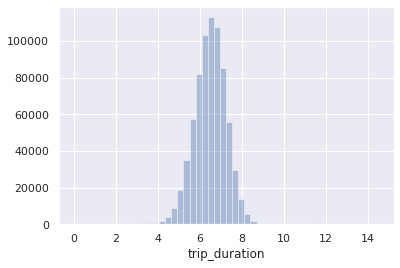

In [ ]:
temp = np.log(df['trip_duration'])
sns.distplot(temp,kde=False)

# Exploring geographical variables 

## Exploring Lat-Long attributes

Let's plot and see if we find any similarities between latitudes and longitudes. We will use log transforms for better visualization and add a contant to dataframe values as logs can't process negative values.

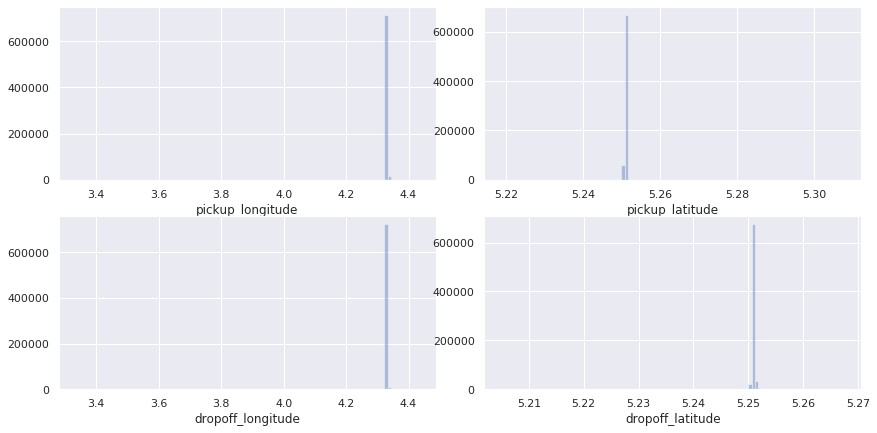

In [ ]:
fig, axes = plt.subplots(nrows =2 , ncols=2, figsize=(12, 6))
fig.tight_layout()
ax1,ax2,ax3,ax4 = axes[0][0] , axes[0][1] , axes[1][0] , axes[1][1] 


temp = np.log(df['pickup_longitude'] + 150) 
sns.distplot(temp, kde = False, bins = 100, ax = ax1)

temp = np.log(df['pickup_latitude'] + 150) 
sns.distplot(temp, kde = False, bins = 100, ax = ax2)

temp = np.log(df['dropoff_longitude'] + 150) 
sns.distplot(temp, kde = False, bins = 100, ax = ax3)

temp = np.log(df['dropoff_latitude'] + 150) 
sns.distplot(temp, kde = False, bins = 100, ax = ax4)

plt.show()

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

From the above plots we can infer that there's no difference between pickup and dropoff longitudes, but some difference between latitudes. Let us now see the corelation between variables.

In [ ]:
df1 = df[['pickup_longitude' , 'pickup_latitude' , 'dropoff_longitude' , 'dropoff_latitude','trip_duration']]
df1.corr()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
pickup_longitude,1.000000,0.047635,0.780647,0.118473,0.035447
pickup_latitude,0.047635,1.000000,0.119970,0.479352,-0.038163
dropoff_longitude,0.780647,0.119970,1.000000,0.149598,0.020664
dropoff_latitude,0.118473,0.479352,0.149598,1.000000,-0.028283
trip_duration,0.035447,-0.038163,0.020664,-0.028283,1.000000


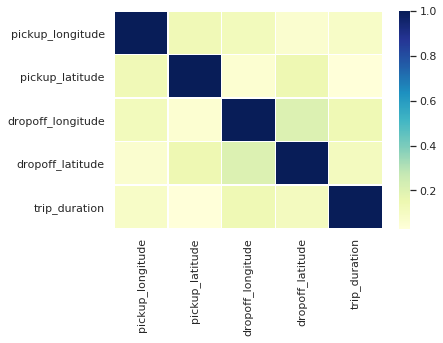

In [ ]:
corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

As seen above, there is no strong co-relation of trip_duration with any of these variables, though there is a strong positive co-relation between pickup_longitude and dropoff_longitude & between pickup_latitude and dropoff_latitude. We will have to calculate the distance in order to get more information

## Distance
Let us calculate the distance between pickup and drop locations and check if it can help us provide some insights

Reference: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude 

In [ ]:
df1 = df[['pickup_longitude' , 'pickup_latitude' , 'dropoff_longitude' , 'dropoff_latitude','trip_duration']]

In [ ]:
import geopy.distance

temp = []

for i in range(0,df1.shape[0]):
  temp.append(geopy.distance.distance((df1['pickup_latitude'][i],df1['pickup_longitude'][i]),(df1['dropoff_latitude'][i],df1['dropoff_longitude'][i])).km)


In [ ]:
df1['distance_km'] = temp
df1['distance_km'] = df1['distance_km'].apply(lambda x:round(x,2))

In [ ]:
df1['distance_km'].shape

(729322,)

In [ ]:
df1['distance_km'].describe()

count    729322.000000
mean          3.442463
std           4.356670
min           0.000000
25%           1.230000
50%           2.100000
75%           3.880000
max        1240.510000
Name: distance_km, dtype: float64

In [ ]:
df1[['distance_km','trip_duration']].corr()

,distance_km,trip_duration
distance_km,1.00000,0.12579
trip_duration,0.12579,1.00000


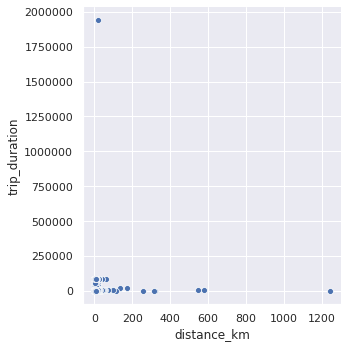

In [ ]:
sns.relplot(x="distance_km", y="trip_duration", data=df1, kind="scatter") #height,aspect

Let's see distribution minus outliers for trip duration 

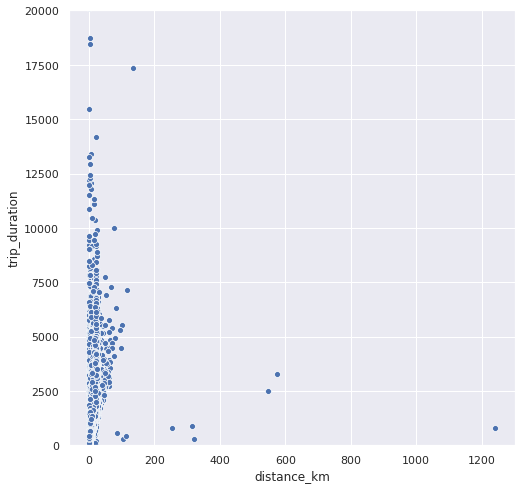

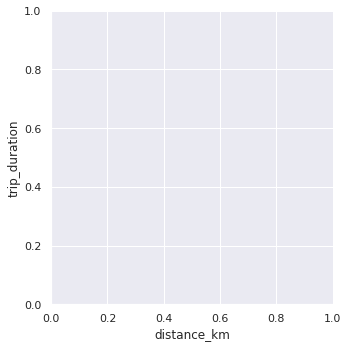

In [ ]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 8)
plt.ylim(0, 20000)
sns.relplot(x="distance_km", y="trip_duration", data=df1, kind="scatter",ax=ax) #height,aspect
plt.show()

As evident from corelation and the plots above, Distance does not have a strong bearing on Trip Duration 

In [ ]:
df['distance_km'] = df1['distance_km']

# Exploring time related features

In [ ]:
print(df['pickup_datetime'].dtypes)
print(df['dropoff_datetime'].dtypes)

object
object


Both of these are categorical features 

Let us see the number of unique values for each

In [ ]:
cat_cols = ['pickup_datetime', 'dropoff_datetime']

for i in range(0,len(cat_cols)):
    print(str(cat_cols[i]) + " - Number of Unique Values: " + str(df[cat_cols[i]].nunique()))

pickup_datetime - Number of Unique Values: 709359
dropoff_datetime - Number of Unique Values: 709308


There are plenty of unique values for both pickup and dropoff datetime. Let us have a look at some frequent ones

In [ ]:
df['pickup_datetime'].value_counts().head(20)

2016-06-11 20:17:45    4
2016-03-12 12:18:11    4
2016-01-06 09:06:01    4
2016-05-20 09:03:18    4
2016-03-03 10:48:41    4
2016-02-24 12:04:42    4
2016-01-31 12:12:58    3
2016-04-02 02:50:18    3
2016-02-16 11:19:47    3
2016-04-11 06:54:42    3
2016-06-29 22:55:46    3
2016-02-18 12:59:58    3
2016-01-21 09:35:03    3
2016-02-06 01:11:32    3
2016-02-13 12:46:32    3
2016-03-07 20:33:06    3
2016-06-03 22:45:45    3
2016-03-18 17:42:53    3
2016-04-04 07:09:41    3
2016-02-26 14:31:55    3
Name: pickup_datetime, dtype: int64

In [ ]:
df['dropoff_datetime'].value_counts().head(20)

2016-05-10 15:56:21    4
2016-02-19 19:25:04    4
2016-02-26 22:08:57    4
2016-02-17 22:26:14    4
2016-02-27 19:23:54    4
2016-01-15 20:27:47    4
2016-04-15 22:17:11    4
2016-06-22 12:06:24    4
2016-06-15 23:11:46    3
2016-06-23 12:30:11    3
2016-03-20 00:23:38    3
2016-03-26 19:28:38    3
2016-05-13 13:09:04    3
2016-02-19 20:54:31    3
2016-06-02 22:28:47    3
2016-04-27 01:14:03    3
2016-04-09 23:28:11    3
2016-01-09 16:25:54    3
2016-04-02 00:37:48    3
2016-02-06 23:31:58    3
Name: dropoff_datetime, dtype: int64

Each timestamp occurs a maximum of 4 times, which cannot provide us any insights. Let's try seperating timestamp into year, month, day and hour to check for insights.

While calculating the trip duration, the pickup time plays a significant role, but the dropoff time does not, as dropoff time is dependent on the time taken to complete the trip and not vice-versa. However, factors such as traffic can influence the trip duration, depending on the pickup time.

Starting with a single value first, we'll devise a method to seperate out the timestamp

In [ ]:
df['pickup_datetime'][0]

'2016-02-29 16:40:21'

In [ ]:
len(df['pickup_datetime'][0])

19

In [ ]:
type(df['pickup_datetime'][0])

str

## Creating new time related features 

Based on the length, datatype and value of the pickup timestamp, we can deduce year, month, day and hour as follows

In [ ]:
df['pickup_timestamp'] = df['pickup_datetime'].copy()

df['pickup_year'] = df['pickup_timestamp'].apply(lambda x:x[0:4])
df['pickup_month'] = df['pickup_timestamp'].apply(lambda x:x[5:7])
df['pickup_day'] = df['pickup_timestamp'].apply(lambda x:x[8:11])
df['pickup_hour'] = df['pickup_timestamp'].apply(lambda x:x[11:13])


### Peeking into our newly created data

In [ ]:
df['pickup_month'].value_counts()

03    128316
04    125634
05    124201
02    119364
06    117406
01    114401
Name: pickup_month, dtype: int64

In [ ]:
df['pickup_year'].value_counts()

2016    729322
Name: pickup_year, dtype: int64

In [ ]:
df['pickup_day'].value_counts()

16     25519
14     25206
12     25156
15     25037
05     25030
04     24958
06     24757
09     24729
13     24649
19     24646
20     24584
10     24575
11     24361
17     24338
21     24260
07     24254
18     24128
08     24113
02     23899
03     23858
26     23709
22     23627
29     23391
27     23376
01     23293
25     23288
28     22916
24     21877
23     20757
30     19642
31     11389
Name: pickup_day, dtype: int64

In [ ]:
df['pickup_hour'].value_counts()

18    45404
19    45262
20    42165
21    42045
22    40293
17    38313
14    37120
12    35820
15    35687
13    35630
23    35069
11    34061
09    33821
08    33612
10    32713
16    32147
07    27907
00    26726
01    19243
06    16552
02    13960
03    10424
04     7827
05     7521
Name: pickup_hour, dtype: int64

It is now clear that we do not need to use year for further analysis as all data is from a single year, i.e 2016. Also, knowing the day of the week might provide some answers, let's extract the same

### Creating day of week feature

In [ ]:
import datetime,calendar 

In [ ]:
def get_weekday(date):
  date = date[:10].replace('-',' ')[:10]
  day = datetime.datetime.strptime(date, '%Y %m %d').weekday() 
  return calendar.day_name[day]

In [ ]:
df['pickup_day_of_week'] = df['pickup_timestamp'].apply(lambda date:get_weekday(date))

In [ ]:
df['pickup_day_of_week'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day_of_week, dtype: int64

## Insights from time variables

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_timestamp', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_hour', 'pickup_day_of_week'],
      dtype='object')

In [ ]:
#time_cols = ['pickup_month','pickup_day','pickup_hour','pickup_day_of_week']
df1 = df[['pickup_month','pickup_day','pickup_hour','pickup_day_of_week','trip_duration']]
df1.dtypes

pickup_month          object
pickup_day            object
pickup_hour           object
pickup_day_of_week    object
trip_duration          int64
dtype: object

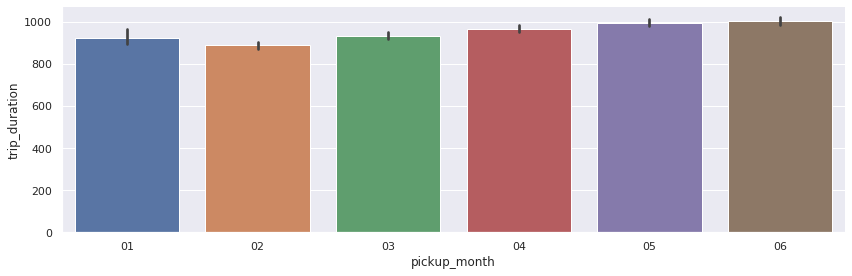

In [ ]:
sns.catplot(x="pickup_month", y="trip_duration",kind="bar",data=df1, height = 4, aspect = 3)

Trip duration is minimum for month 2, maximum for months 5 & 6.

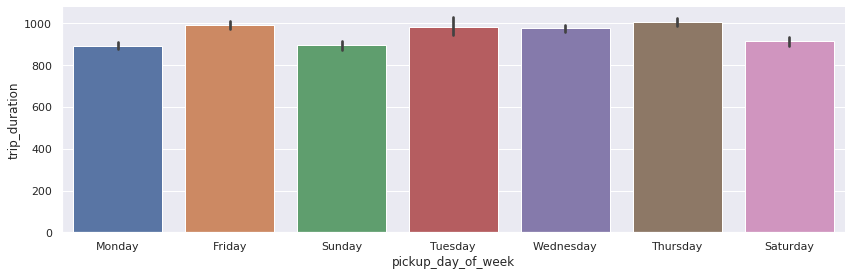

In [ ]:
sns.catplot(x="pickup_day_of_week", y="trip_duration",kind="bar",data=df1, height = 4, aspect = 3)

We can see that the trip durations are highest on Thursdays and Fridays, slightly lesser on Tuesdays and Wednesdays and lowest on Saturdays,Sundays and Mondays. 

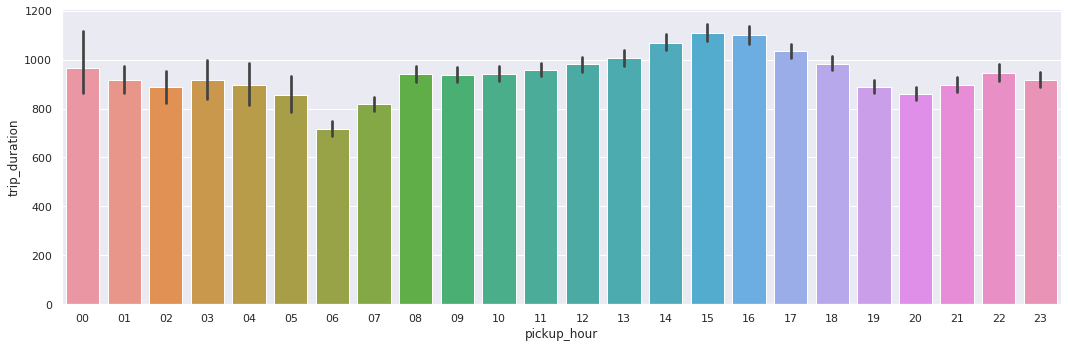

In [ ]:
sns.catplot(x="pickup_hour", y="trip_duration",kind="bar",data=df1, height = 5, aspect = 3)

The peak hours for traffic are for trips starting within 15:00 - 16:00 / 16:00-17:00 range and trips starting between 6:00 - 7:00, complete in quickest time

Bin ranges start from -1, since lower count of bin is not included in the interval, so the first interval starts from 0.

In [ ]:
bins = [-1, 5, 11, 17, 23]
labels = ['00:00-05:59','06:00-11:59','12:00-17:59','18:00-23:59']
df1['numeric_pickup_hour'] = pd.to_numeric(df1['pickup_hour'], errors='coerce')
df1['pickup_hour_binned'] = pd.cut(df1['numeric_pickup_hour'], bins,labels=labels)
df1['pickup_hour_binned'].value_counts()

18:00-23:59    250238
12:00-17:59    214717
06:00-11:59    178666
00:00-05:59     85701
Name: pickup_hour_binned, dtype: int64

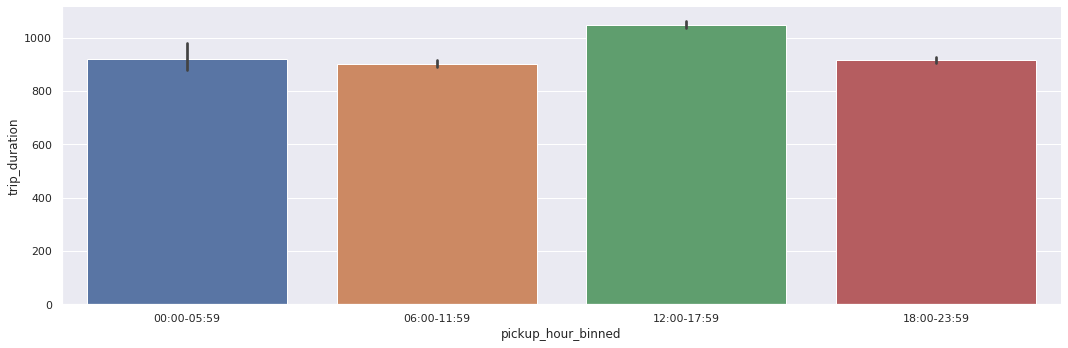

In [ ]:
sns.catplot(x="pickup_hour_binned", y="trip_duration",kind="bar",data=df1, height = 5, aspect = 3)

Average trip times are significantly higher for trips starting between 12:00-17:59 as compared to other intervals. Let us now combine the binned pickup hours and pickup_day_of_week features, to see if we can uncover more insights.


### Checking effect of day of week and pickup hour combined on trip duration

In [ ]:
df2 = df1[['pickup_day_of_week','pickup_hour_binned','trip_duration']]
df2_pivot = pd.pivot_table(df2,index=['pickup_day_of_week','pickup_hour_binned'],values='trip_duration')

We will sort the pivot table we created by trip duration, to find out whether the combination of pickup day of week and time have any bearing on trip duration

In [ ]:
df2_pivot = df2_pivot.reindex(df2_pivot.sort_values(by='trip_duration', ascending=False).index)

In [ ]:
df2_pivot

,,trip_duration
pickup_day_of_week,pickup_hour_binned,
Tuesday,00:00-05:59,1149.944781
Thursday,12:00-17:59,1137.512548
Wednesday,12:00-17:59,1133.294948
Friday,12:00-17:59,1120.007088
Tuesday,12:00-17:59,1081.795633
Thursday,06:00-11:59,981.267437
Monday,12:00-17:59,980.306560
Saturday,00:00-05:59,977.477037
Thursday,18:00-23:59,964.968532


As evident from table above, the combination of pickup day of week and time has a significant effect on trip duration. Maximum trip duration is for Tuesday 00:00-05:59 and minimum is for Sunday between 06:00-11:59 

# Exploring other features

In [ ]:
#vendor_id, passenger_count, store_and_fwd_flag
df1 = df[['vendor_id','passenger_count','store_and_fwd_flag','trip_duration']]

In [ ]:
df1.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration
0,2,1,N,400
1,1,2,N,1100
2,2,2,N,1635
3,2,6,N,1141
4,1,1,N,848


In [ ]:
df1.vendor_id.value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

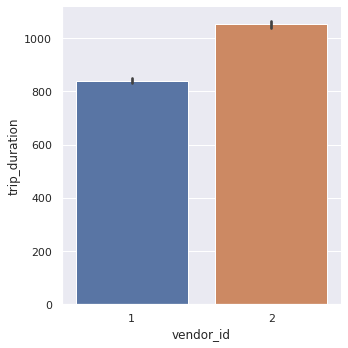

In [ ]:
sns.catplot(x="vendor_id", y="trip_duration",kind="bar",data=df1)

It is clearly evident that trip durations for vendor 2 are higher than vendor 1.

In [ ]:
df1.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

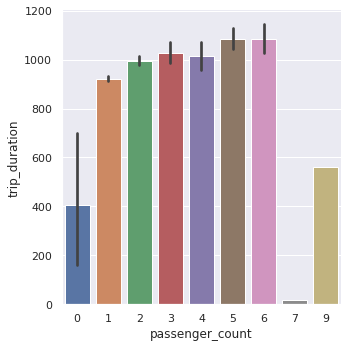

In [ ]:
sns.catplot(x="passenger_count", y="trip_duration",kind="bar",data=df1)

The general trend here trip duration increases as the passenger count increases from 1 to 6, with a slight decrease from 3 to 4. We can ignore 0,7 & 9, since these have a negligible presence in the dataset. 

In [ ]:
df1.store_and_fwd_flag.value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

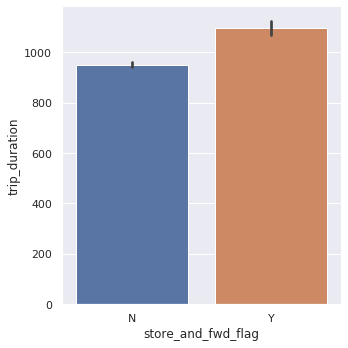

In [ ]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="bar",data=df1)

The trip duration is significantly greater when store_and_fwd_flag is set to Y, as compared to when it is N. However, it is to be noted that the flag is set to N, majority of the times.

# Summary

We have uncovered following insights for each attribute:


Trip Duration:
1. Majority of the trips complete within 2500 seconds.
2. There are a few outliers, on the higher side but these seem to be genuine since, trips can sometimes take a long time to complete.


Pickup Year: 
1. No impact since all data is for 2016

Pickup Month: 
1. Trip duration is maximum for months 5 & 6 and minimum for month 
2. There is a discernible difference between trip durations for each month, but it’s better to view more granular aspects such as day/hour for more insights

Pickup Day of Week:
1. Significant difference in travel times depending on week of day.
2. Trip durations are highest on Thursdays and Fridays, slightly lesser on Tuesdays and Wednesdays and lowest on Saturdays,Sundays and Mondays.

Pickup Hour:
1. Trip duration varies depending on the hour
2. The peak hours for traffic are for trips starting within 15:00 - 16:00 / 16:00-17:00 range and trips starting between 6:00 - 7:00, complete in quickest time
3. After binning we can infer that average trip times are significantly higher for trips starting between 12:00-17:59 as compared to other intervals

Pickup Hour and Week of Day:
1. The combination of pickup day of week and time has a significant effect on trip duration
2. Maximum trip duration is for Tuesday 00:00-05:59 and minimum is for Sunday between 06:00-11:59

Geographical Attributes:
1. Neither the pickup and dropoff latitudes and longitudes, nor distance has any significant impact on trip duration.


Vendor:
1. Trip durations are higher for vendor 2 than vendor 1, both of them have undertaken a significant amount of trips to reach to this conclusion.

Passenger Count:
1. Passenger seems to have an impact on trip duration
2. The general trend here trip duration increases as the passenger count increases from 1 to 6, with a slight decrease from 3 to 4. We can ignore 0,7 & 9, since these have a negligible presence in the dataset.

We have 2 variables dropoff_datetime and store_and_fwd_flag which are not available before the trip starts and hence will not be used as features to the model.
